# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_selection import SelectKBest, f_classif
from google.colab import drive

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
#Type your code here
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/MSIB/Dataset_clustering.csv'
df = pd.read_csv(file_path)
df.head()

Mounted at /content/drive


,year,month,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
0,2014,1,SFL,FLORIDA,EPG0,Natural Gas,VCS,Commercial Consumption,N3020FL2,Natural Gas Deliveries to Commercial Consumers...,6605.0,MMCF
1,2014,1,SNH,USA-NH,EPG0,Natural Gas,VCS,Commercial Consumption,N3020NH2,Natural Gas Deliveries to Commercial Consumers...,1691.0,MMCF
2,2014,1,SOR,USA-OR,EPG0,Natural Gas,VCS,Commercial Consumption,N3020OR2,Natural Gas Deliveries to Commercial Consumers...,4711.0,MMCF
3,2014,1,SDE,USA-DE,EPG0,Natural Gas,VCS,Commercial Consumption,N3020DE2,Natural Gas Deliveries to Commercial Consumers...,2128.0,MMCF
4,2014,1,SAZ,USA-AZ,EPG0,Natural Gas,VCS,Commercial Consumption,N3020AZ2,Natural Gas Deliveries to Commercial Consumers...,3915.0,MMCF


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

**Memahami Struktur Data**

In [3]:
#Type your code here
print("Jumlah baris dan kolom:", df.shape)
df.info()

Jumlah baris dan kolom: (37994, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37994 entries, 0 to 37993
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                37994 non-null  int64  
 1   month               37994 non-null  int64  
 2   duoarea             37994 non-null  object 
 3   area-name           37994 non-null  object 
 4   product             37994 non-null  object 
 5   product-name        37994 non-null  object 
 6   process             37994 non-null  object 
 7   process-name        37994 non-null  object 
 8   series              37994 non-null  object 
 9   series-description  37994 non-null  object 
 10  value               37518 non-null  float64
 11  units               37994 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 3.5+ MB


In [4]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


**Menangani Data yang Hilang dan Tipe Data**

In [5]:
# Menangani Data yang Hilang
print("Jumlah missing values per kolom:")
print(df.isnull().sum())

Jumlah missing values per kolom:
year                    0
month                   0
duoarea                 0
area-name               0
product                 0
product-name            0
process                 0
process-name            0
series                  0
series-description      0
value                 476
units                   0
dtype: int64


In [6]:
df['value'].fillna(df['value'].median(), inplace=True)

<ipython-input-6-9353736aec7d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['value'].fillna(df['value'].median(), inplace=True)


In [7]:
print(df.isnull().sum())

year                  0
month                 0
duoarea               0
area-name             0
product               0
product-name          0
process               0
process-name          0
series                0
series-description    0
value                 0
units                 0
dtype: int64


**Analisis Distribusi dan Korelasi**

In [8]:
# Statistik deskriptif
df.describe()

,year,month,value
count,37994.000000,37994.000000,3.799400e+04
mean,2018.545455,6.454545,2.939094e+04
std,2.903442,3.473677,1.495017e+05
min,2014.000000,1.000000,0.000000e+00
25%,2016.000000,3.000000,8.482500e+02
50%,2019.000000,6.000000,4.380000e+03
75%,2021.000000,9.000000,1.589525e+04
max,2024.000000,12.000000,3.391775e+06


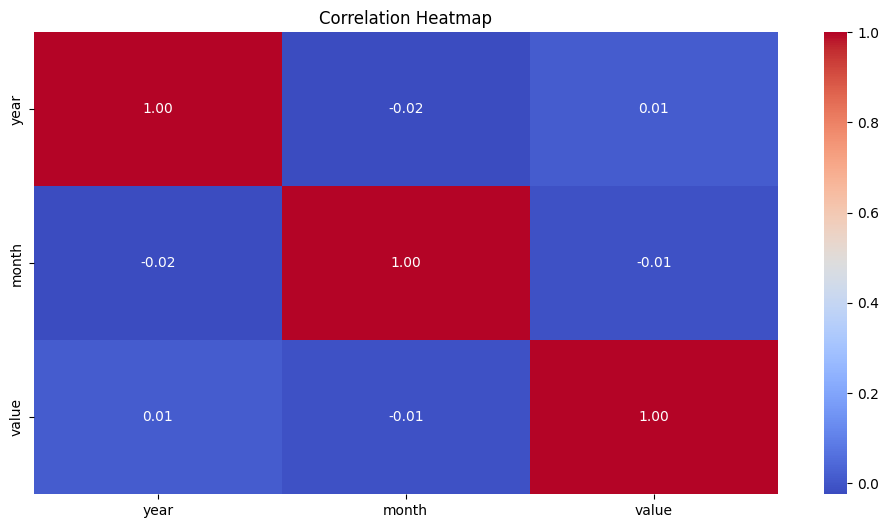

In [9]:
# Visualisasi distribusi fitur
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

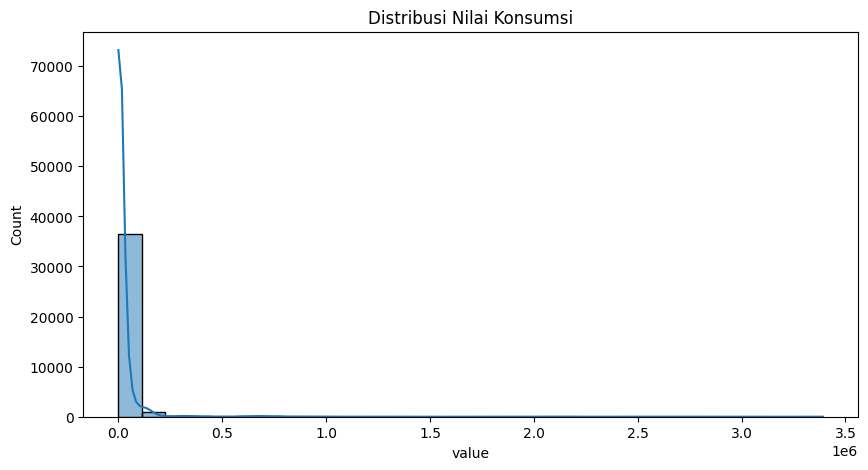

In [10]:
plt.figure(figsize=(10,5))
sns.histplot(df['value'], bins=30, kde=True)
plt.title("Distribusi Nilai Konsumsi")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

**Encoding Data Kategorical**

In [11]:
# Encoding categorical features
label_encoders = {}
for col in ['area-name', 'product-name']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [12]:
# Deteksi dan penanganan outlier menggunakan Z-Score
z_scores = np.abs(stats.zscore(df[['value']]))
df = df[(z_scores < 3).all(axis=1)]  # Menghapus outlier di luar 3 standar deviasi

<Figure size 1200x600 with 0 Axes>

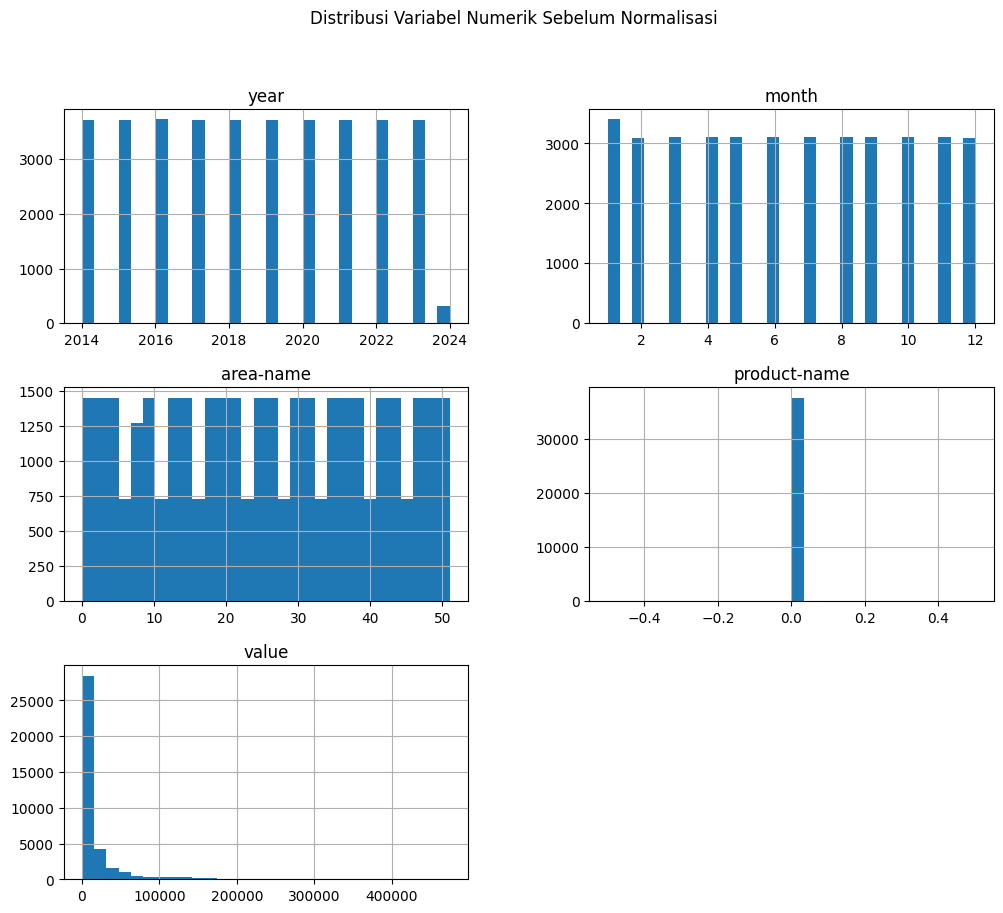

In [13]:
# Visualisasi distribusi fitur sebelum normalisasi
plt.figure(figsize=(12, 6))
df.hist(figsize=(12, 10), bins=30)
plt.suptitle("Distribusi Variabel Numerik Sebelum Normalisasi")
plt.show()

In [14]:
# Normalisasi Data dengan berbagai metode
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

silhouette_scores = {}

for scaler_name, scaler in scalers.items():
    df_scaled = pd.DataFrame(scaler.fit_transform(df[['year', 'month', 'area-name', 'product-name', 'value']]),
                             columns=['year', 'month', 'area-name', 'product-name', 'value'])


<Figure size 1200x600 with 0 Axes>

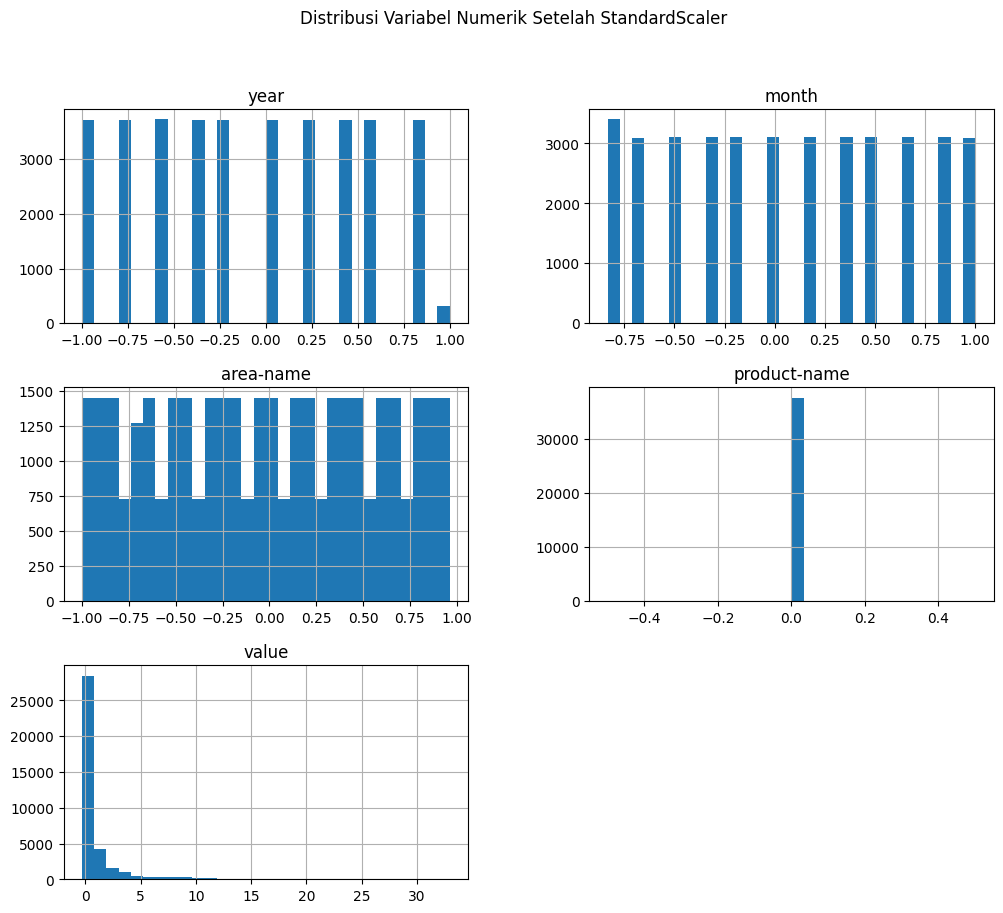

In [15]:
# Visualisasi distribusi fitur setelah normalisasi
plt.figure(figsize=(12, 6))
df_scaled.hist(figsize=(12, 10), bins=30) # Changed df_scaled() to df_scaled.hist()
plt.suptitle("Distribusi Variabel Numerik Setelah StandardScaler")
plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [16]:
# Menggunakan PCA untuk reduksi dimensi
pca = PCA(n_components=3)
X_pca = pca.fit_transform(df_scaled)

In [17]:
# Menentukan jumlah cluster optimal berdasarkan Silhouette Score
best_k = None
best_silhouette = -1

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, clusters)

    if score > best_silhouette:
        best_k = k
        best_silhouette = score

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [18]:
# Menjalankan K-Means dengan jumlah optimal setelah PCA
kmeans_opt = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df_scaled['kmeans_cluster'] = kmeans_opt.fit_predict(X_pca)

In [19]:
# Evaluasi ulang Silhouette Score setelah PCA
silhouette_opt = silhouette_score(X_pca, df_scaled['kmeans_cluster'])

In [20]:
# Menjalankan DBSCAN dengan eps yang disesuaikan
dbscan = DBSCAN(eps=0.4, min_samples=6)
df_scaled['dbscan_cluster'] = dbscan.fit_predict(X_pca)

silhouette_dbscan = silhouette_score(X_pca, df_scaled['dbscan_cluster'])

# Create a dictionary to store silhouette scores for different scalers
# If silhouette_scores_dict doesn't exist, create it
if 'silhouette_scores_dict' not in globals():
    silhouette_scores_dict = {}

# Store the silhouette scores for the current scaler
silhouette_scores_dict[scaler_name] = { # Changed silhouette_score to silhouette_scores_dict
    'KMeans_Silhouette': silhouette_opt, # Changed 'K-Means' to 'KMeans_Silhouette'
    'DBSCAN_Silhouette': silhouette_dbscan # Changed 'DBSCAN' to 'DBSCAN_Silhouette'
}

In [21]:
 print(f"{scaler_name} - KMeans Silhouette Score: {silhouette_opt:.4f}, DBSCAN Silhouette Score: {silhouette_dbscan:.4f}")

RobustScaler - KMeans Silhouette Score: 0.8112, DBSCAN Silhouette Score: 0.7630


Nilai Silhouette Score tertinggi yaitu dengan normalisasi RobustScaler dan algoritma Kmeans dengan 0.8112, Maka digunakan untuk analisis dan interpretasi menggunakan Kmeans.

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

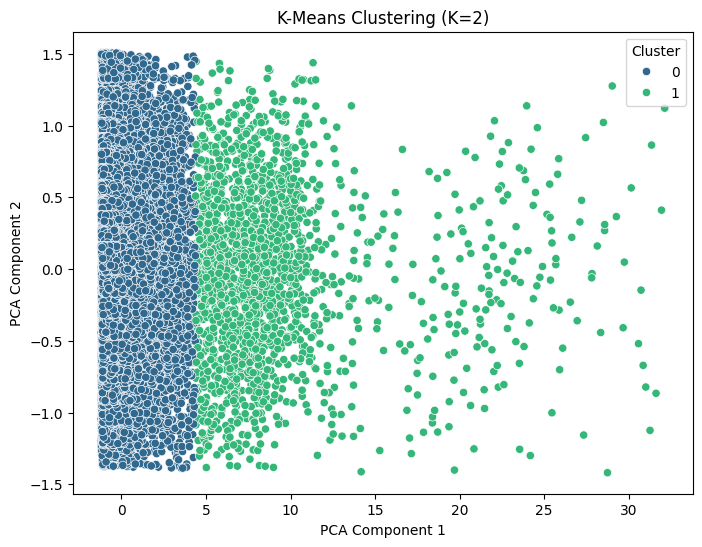

In [22]:
# Visualisasi K-Means
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_scaled['kmeans_cluster'], palette='viridis')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title(f"K-Means Clustering (K={best_k})")
plt.legend(title="Cluster")
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [30]:
# Menambahkan Hasil Label Cluster ke DataFrame
df_scaled['Cluster'] = kmeans_opt.labels_

# Menyimpan nilai asli 'area-name' dan 'product-name' sebelum inverse transform
df_scaled['original_area_name'] = df['area-name'].copy()
df_scaled['original_product_name'] = df['product-name'].copy()

# Inverse Transform pada Fitur yang Telah Dielingkupi Label Encoding dan Standarisasi
# Inverse Transform untuk Label Encoding pada kolom 'area-name' dan 'product-name'
df_scaled['area-name'] = label_encoders['area-name'].inverse_transform(df_scaled['original_area_name'].fillna(df_scaled['original_area_name'].mode()[0]).astype(int))
df_scaled['product-name'] = label_encoders['product-name'].inverse_transform(df_scaled['original_product_name'].fillna(df_scaled['original_product_name'].mode()[0]).astype(int))


# Mengembalikan Data ke Bentuk Asli
# Menyimpan Data yang Sudah Di-Inverse dalam DataFrame baru
df_original = df.copy()
df_original['area-name'] = df_scaled['area-name']
df_original['product-name'] = df_scaled['product-name']
df_original['Cluster'] = df_scaled['Cluster']  # Menambahkan hasil klaster ke dalam dataset asli

# Menampilkan DataFrame Asli dengan Hasil Cluster
print(df_original)

       year  month duoarea area-name product product-name process  \
0      2014      1     SFL   FLORIDA    EPG0  Natural Gas     VCS   
1      2014      1     SNH    USA-NH    EPG0  Natural Gas     VCS   
2      2014      1     SOR    USA-OR    EPG0  Natural Gas     VCS   
3      2014      1     SDE    USA-DE    EPG0  Natural Gas     VCS   
4      2014      1     SAZ    USA-AZ    EPG0  Natural Gas     VCS   
...     ...    ...     ...       ...     ...          ...     ...   
37989  2024      1     SMN       NaN    EPG0          NaN     VRS   
37990  2024      1     SNE       NaN    EPG0          NaN     VRS   
37991  2024      1     SVA       NaN    EPG0          NaN     VRS   
37992  2024      1     SCT       NaN    EPG0          NaN     VRS   
37993  2024      1     SMA       NaN    EPG0          NaN     VRS   

                  process-name    series  \
0       Commercial Consumption  N3020FL2   
1       Commercial Consumption  N3020NH2   
2       Commercial Consumption  N3020OR

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [31]:
# Inverse Transform untuk Data yang Telah Distandarisasi (StandardScaler) atau Dinormalisasi (MinMaxScaler)
# Inverse Transform untuk Data Numerik yang Telah Distandarisasi atau Dinormalisasi
numerical_features = ['year', 'month', 'value']  # Only include numerical features

# Create a new scaler and fit it to the selected numerical features
new_scaler = RobustScaler() # or the desired scaler type: StandardScaler(), MinMaxScaler()
new_scaler.fit(df[numerical_features]) # Fit to original data for selected features

# Apply inverse_transform using the new scaler with the correct feature subset
df_scaled[numerical_features] = new_scaler.inverse_transform(df_scaled[numerical_features])

# Menambahkan hasil inverse transform ke dalam dataset asli
df_original[numerical_features] = df_scaled[numerical_features]

# Menampilkan DataFrame dengan hasil inverse transform
#tools.display_dataframe_to_user(name="Inverse Transformed Data", dataframe=df_original) # Assuming tools.display_dataframe_to_user is a custom function
print(df_original) # Printing the dataframe instead of using the custom function

         year  month duoarea area-name product product-name process  \
0      2014.0    1.0     SFL   FLORIDA    EPG0  Natural Gas     VCS   
1      2014.0    1.0     SNH    USA-NH    EPG0  Natural Gas     VCS   
2      2014.0    1.0     SOR    USA-OR    EPG0  Natural Gas     VCS   
3      2014.0    1.0     SDE    USA-DE    EPG0  Natural Gas     VCS   
4      2014.0    1.0     SAZ    USA-AZ    EPG0  Natural Gas     VCS   
...       ...    ...     ...       ...     ...          ...     ...   
37989     NaN    NaN     SMN       NaN    EPG0          NaN     VRS   
37990     NaN    NaN     SNE       NaN    EPG0          NaN     VRS   
37991     NaN    NaN     SVA       NaN    EPG0          NaN     VRS   
37992     NaN    NaN     SCT       NaN    EPG0          NaN     VRS   
37993     NaN    NaN     SMA       NaN    EPG0          NaN     VRS   

                  process-name    series  \
0       Commercial Consumption  N3020FL2   
1       Commercial Consumption  N3020NH2   
2       Commerc

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [32]:
# Analisis Karakteristik Setiap Cluster
# Menghitung statistik deskriptif untuk setiap cluster
cluster_summary = df_original.groupby('Cluster').agg({
    'year': 'mean',
    'month': 'mean',
    'area-name': lambda x: x.mode()[0] if not x.empty else np.nan,  # Use mode for categorical data
    'product-name': lambda x: x.mode()[0] if not x.empty else np.nan,  # Use mode for categorical data
    'value': 'mean'
}).reset_index()

# Menampilkan ringkasan karakteristik cluster
# Assuming tools.display_dataframe_to_user is a custom function
# If you don't have this function, you can replace it with print(cluster_summary)
# tools.display_dataframe_to_user(name="Cluster Characteristic Summary", dataframe=cluster_summary)
print(cluster_summary) # Printing the dataframe instead of using the custom function

   Cluster         year    month area-name product-name          value
0      0.0  2018.535232  6.47169  NEW YORK  Natural Gas    9792.022772
1      1.0  2018.739328  6.26864    USA-GA  Natural Gas  147563.780307


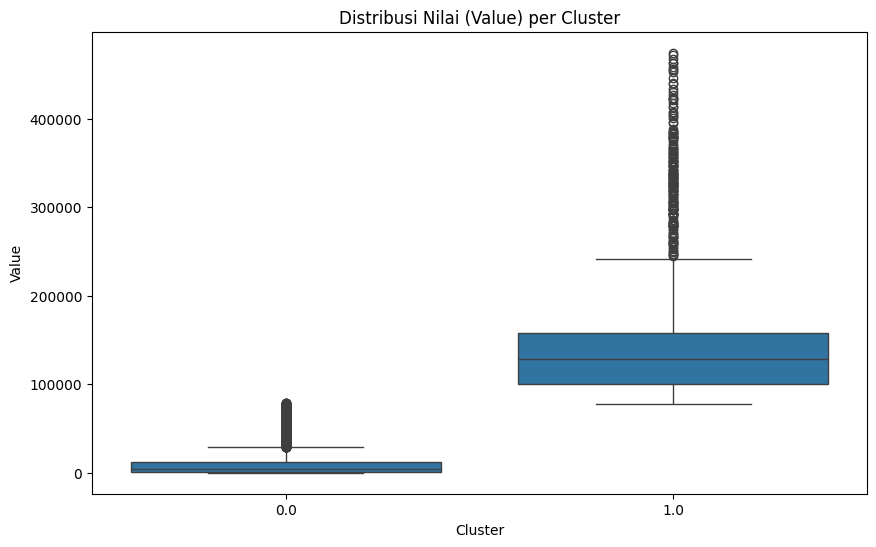

In [33]:
# Analisis Distribusi Nilai dalam Setiap Cluster
# Distribusi nilai (misalnya, distribusi 'value' dalam tiap cluster)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='value', data=df_original)
plt.title("Distribusi Nilai (Value) per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Value")
plt.show()

Tulis hasil interpretasinya di sini.
1. Cluster 0:
   

*   **Rata-rata tahun**: 2018.53
*   **Rata-rata bulan**: 6.47 (Juni)
*   **Rata-rata area**: New York
*   **Rata-rata Product**: Natural Gas
*   **Rata-rata nilai konsumsi**: 9792.02
*   **Analisis**: Cluster ini mencakup wilayah New York dengan konsumsi gas alam yang relatif sedang. Data pelanggan di cluster ini cenderung memiliki konsumsi energi yang moderat, dengan fokus pada penggunaan natural gas. Dengan rata-rata tahun yang berada pada 2018 dan bulan yang rata-rata sekitar Juni, ini menunjukkan adanya pola konsumsi energi pada periode tertentu.

2. Cluster 1:
*   **Rata-rata tahun**: 2018.74
*   **Rata-rata bulan**: 6.27 (Juni)
*   **Rata-rata area**: USA-GA
*   **Rata-rata Product**: Natural Gas
*   **Rata-rata nilai konsumsi**: 147563.78
*   **Analisis**: Cluster ini mencakup wilayah Georgia (USA-GA) dengan konsumsi gas alam yang sangat tinggi. Konsumsi energi di cluster ini jauh lebih tinggi dibandingkan cluster lainnya, mengindikasikan adanya pelanggan dengan tingkat konsumsi energi yang besar. Seperti cluster sebelumnya, mereka juga menggunakan natural gas, tetapi dengan jumlah yang jauh lebih tinggi.


# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [34]:
df_original.to_csv("Dataset_inisiasi.csv", index=False)